<span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">$$P^3$$</span>
===
 <center> <span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">robabilistic </span> <span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">recipitation </span><span style="color: #f2cf4a ; font-family: Babas; font-size: 3em;">P</span><span style="color: #00000; font-family: Babas; font-size: 3em;">rediction </span>  </center>
********

## Imports

In [113]:
%matplotlib inline
import os

import datetime as dt
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima_model import ARIMA

from IPython.display import display, HTML
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

matplotlib.style.use('ggplot')

## Directories

In [114]:
# Setup directories
CWD = os.getcwd()

DATA_DIR = CWD + "/data/"
CLEAN_DATA_DIR = DATA_DIR + "clean/"
OUT_DIR = CWD + "/output/"

## Preview Data

In [115]:
f = open(DATA_DIR+"eng-daily-01012016-12312016.csv", "r")
lines = f.readlines()
lines = lines[25:]
f.close()

f = open(CLEAN_DATA_DIR+"eng-daily-01012016-12312016.csv", "w+")
f.writelines(lines)
f.truncate()
f.close()

prev = pd.read_csv(CLEAN_DATA_DIR+"eng-daily-01012016-12312016.csv")
# display(prev)

## Build Training Set

In [116]:
def clean_data(in_dir, out_dir, filename):
    """
    
    """
    f = open(in_dir+filename, "r")
    lines = f.readlines()
    lines = lines[25:]
    f.close()

    f = open(out_dir+filename, "w+")
    f.writelines(lines)
    f.truncate()
    f.close()

Use the first 44 of 64 years of the data as the training set (this is roughly 70%). Hold the most recent 30% as the tet set.

In [117]:
frames = []
DATE_SEP = 44 * 365

for filename in os.listdir(DATA_DIR):
    if filename != "clean":
        clean_data(DATA_DIR, CLEAN_DATA_DIR, filename) 
        frames.append(pd.read_csv(CLEAN_DATA_DIR+filename))

data = pd.concat(frames)
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format="%Y-%m-%d")
data.sort_values("Date/Time", ascending=True, inplace=True)
train_data = data[0:DATE_SEP]
test_data = data[DATE_SEP:]
display(train_data)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1953-01-01,1953,1,1,NaN,0.6,NaN,-6.7,NaN,-3.1,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
1,1953-01-02,1953,1,2,NaN,1.7,NaN,-1.1,NaN,0.3,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
2,1953-01-03,1953,1,3,NaN,1.7,NaN,-2.2,NaN,-0.3,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
3,1953-01-04,1953,1,4,NaN,-2.2,NaN,-11.7,NaN,-7.0,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
4,1953-01-05,1953,1,5,NaN,-1.1,NaN,-6.7,NaN,-3.9,...,0.5,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1953-01-06,1953,1,6,NaN,-5.6,NaN,-11.7,NaN,-8.7,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
6,1953-01-07,1953,1,7,NaN,-10.0,NaN,-15.6,NaN,-12.8,...,0.0,T,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
7,1953-01-08,1953,1,8,NaN,-5.6,NaN,-12.8,NaN,-9.2,...,7.6,NaN,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1953-01-09,1953,1,9,NaN,-2.8,NaN,-10.6,NaN,-6.7,...,0.0,NaN,0.0,T,NaN,NaN,NaN,NaN,NaN,NaN
9,1953-01-10,1953,1,10,NaN,1.1,NaN,-3.9,NaN,-1.4,...,5.1,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
display(test_data)

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
355,1996-12-21,1996,12,21,NaN,-0.1,NaN,-10.2,NaN,-5.2,...,0.0,T,0.0,T,0.0,T,19.0,NaN,44,NaN
356,1996-12-22,1996,12,22,NaN,2.1,NaN,-0.3,NaN,0.9,...,0.2,NaN,0.4,NaN,0.0,T,NaN,NaN,<31,NaN
357,1996-12-23,1996,12,23,NaN,7.2,NaN,0.9,NaN,4.1,...,0.0,NaN,17.0,NaN,0.0,NaN,15.0,NaN,32,NaN
358,1996-12-24,1996,12,24,NaN,10.1,NaN,-8.7,NaN,0.7,...,0.6,NaN,1.4,NaN,0.0,NaN,31.0,NaN,67,NaN
359,1996-12-25,1996,12,25,NaN,-4.7,NaN,-9.9,NaN,-7.3,...,1.0,NaN,0.8,NaN,0.0,T,25.0,NaN,48,NaN
360,1996-12-26,1996,12,26,NaN,-5.6,NaN,-9.7,NaN,-7.7,...,5.8,NaN,5.8,NaN,1.0,NaN,NaN,NaN,<31,NaN
361,1996-12-27,1996,12,27,NaN,0.0,NaN,-6.1,NaN,-3.1,...,0.0,T,0.0,T,7.0,NaN,NaN,NaN,<31,NaN
362,1996-12-28,1996,12,28,NaN,5.7,NaN,-0.3,NaN,2.7,...,0.0,NaN,0.0,T,5.0,NaN,26.0,NaN,33,NaN
363,1996-12-29,1996,12,29,NaN,3.3,NaN,-2.3,NaN,0.5,...,0.0,NaN,1.4,NaN,0.0,T,31.0,NaN,46,NaN
364,1996-12-30,1996,12,30,NaN,-2.0,NaN,-7.7,NaN,-4.9,...,1.4,NaN,1.4,NaN,0.0,NaN,31.0,NaN,37,NaN


# EDA

### Plot the Series

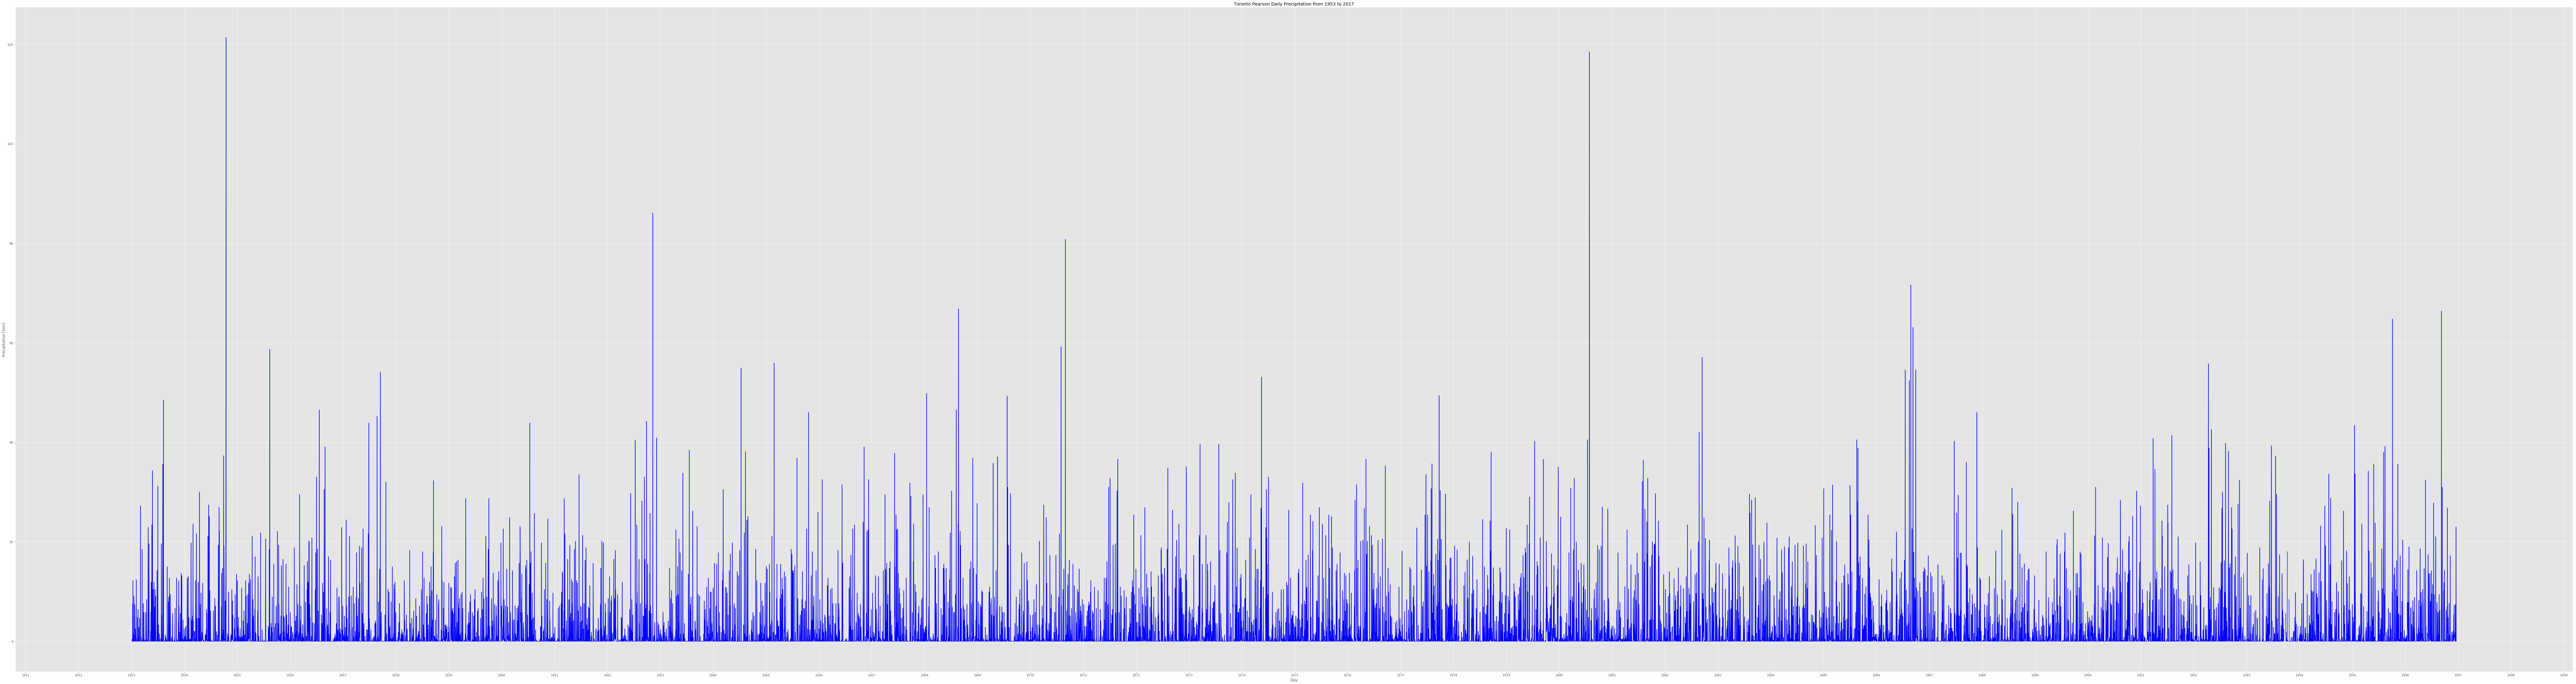

In [119]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(150, 40))
ax.plot_date(train_data["Date/Time"], train_data["Total Precip (mm)"], fmt='b-')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()
plt.ylabel("Precipitation [mm]")
plt.xlabel("Day")
plt.title("Toronto Pearson Daily Precipitation from 1953 to 2017")
plt.savefig(OUT_DIR + "raw_data.png")

### Descriptive Statistics

In [120]:
print(train_data.ix[:, 4:].describe(include=[np.number])) # Exclude Year, Month and Day, only include numbers

       Max Temp (°C)  Max Temp Flag  Min Temp (°C)  Min Temp Flag  \
count   16000.000000            0.0   16000.000000            0.0   
mean       12.517050            NaN       2.310563            NaN   
std        11.569048            NaN      10.099816            NaN   
min       -21.000000            NaN     -31.300000            NaN   
25%         2.800000            NaN      -4.400000            NaN   
50%        13.000000            NaN       2.400000            NaN   
75%        22.800000            NaN      10.600000            NaN   
max        37.600000            NaN      24.400000            NaN   

       Mean Temp (°C)  Mean Temp Flag  Heat Deg Days (°C)  Heat Deg Days Flag  \
count    16000.000000             0.0        16000.000000                 0.0   
mean         7.425019             NaN           11.258156                 NaN   
std         10.676333             NaN            9.777644                 NaN   
min        -24.700000             NaN            0.000

There are a few numeric columns full of NaNs (all the flags). Average total rain is pretty small. Average max temp is 12.5 degrees Celsius, Canada is cold.

In [121]:
train_data["Total Precip (mm)"].value_counts()

0.0      9847
0.3       481
0.8       331
0.2       325
0.5       311
1.0       235
0.4       200
1.8       169
1.3       141
2.0       137
0.6       126
2.8       117
2.3       103
1.5       102
3.0       101
2.5        88
3.6        87
1.2        79
1.4        79
3.8        75
3.3        73
4.8        69
4.6        65
5.8        63
6.6        60
1.6        59
4.1        58
5.6        54
2.4        54
7.6        52
         ... 
22.3        1
27.6        1
86.1        1
49.4        1
26.8        1
54.1        1
55.9        1
25.0        1
118.5       1
49.3        1
31.3        1
40.9        1
55.8        1
32.1        1
24.5        1
15.9        1
23.3        1
28.8        1
35.8        1
22.0        1
23.0        1
48.5        1
63.1        1
34.2        1
35.3        1
16.7        1
49.8        1
64.8        1
27.8        1
27.9        1
Name: Total Precip (mm), dtype: int64

Of the ~16k rows, ~10k have zero recorded precipitation. Not good.

### Histogram of Precipitation

(array([  1.29430000e+04,   1.01200000e+03,   6.03000000e+02,
          4.13000000e+02,   2.59000000e+02,   2.19000000e+02,
          1.43000000e+02,   1.23000000e+02,   8.10000000e+01,
          5.80000000e+01,   3.90000000e+01,   3.00000000e+01,
          3.40000000e+01,   2.30000000e+01,   1.40000000e+01,
          1.60000000e+01,   1.40000000e+01,   4.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

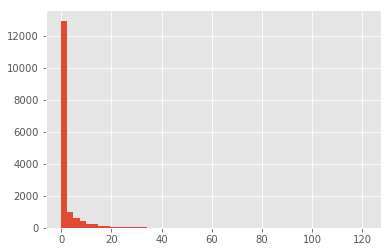

In [122]:
plt.hist(train_data["Total Precip (mm)"].fillna(0), bins=50)

### Yearly Plots

# AR Models

In [123]:
traind = train_data.set_index('Date/Time')
testd = test_data.set_index('Date/Time')

In [124]:
print(testd)

            Year  Month  Day Data Quality  Max Temp (°C)  Max Temp Flag  \
Date/Time                                                                 
1996-12-21  1996     12   21          NaN           -0.1            NaN   
1996-12-22  1996     12   22          NaN            2.1            NaN   
1996-12-23  1996     12   23          NaN            7.2            NaN   
1996-12-24  1996     12   24          NaN           10.1            NaN   
1996-12-25  1996     12   25          NaN           -4.7            NaN   
1996-12-26  1996     12   26          NaN           -5.6            NaN   
1996-12-27  1996     12   27          NaN            0.0            NaN   
1996-12-28  1996     12   28          NaN            5.7            NaN   
1996-12-29  1996     12   29          NaN            3.3            NaN   
1996-12-30  1996     12   30          NaN           -2.0            NaN   
1996-12-31  1996     12   31          NaN           -7.3            NaN   
1997-01-01  1997      1  

### ARIMA
This model is trash and doesn't work very well. Lots of zeros in dataset which strongly suppresses the predictions of the model.

In [125]:
model = ARIMA(traind["Total Precip (mm)"].fillna(0), order=(1,0,1))
model_fit = model.fit(disp=0)  
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:      Total Precip (mm)   No. Observations:                16060
Model:                     ARMA(1, 1)   Log Likelihood              -50445.153
Method:                       css-mle   S.D. of innovations              5.596
Date:                Fri, 24 Mar 2017   AIC                         100898.307
Time:                        16:40:47   BIC                         100929.043
Sample:                    01-01-1953   HQIC                        100908.471
                         - 12-20-1996                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.1162      0.047     45.261      0.000       2.025       2.208
ar.L1.Total Precip (mm)    -0.2249      0.094     -2.396      0.017      -0.409      -0.041


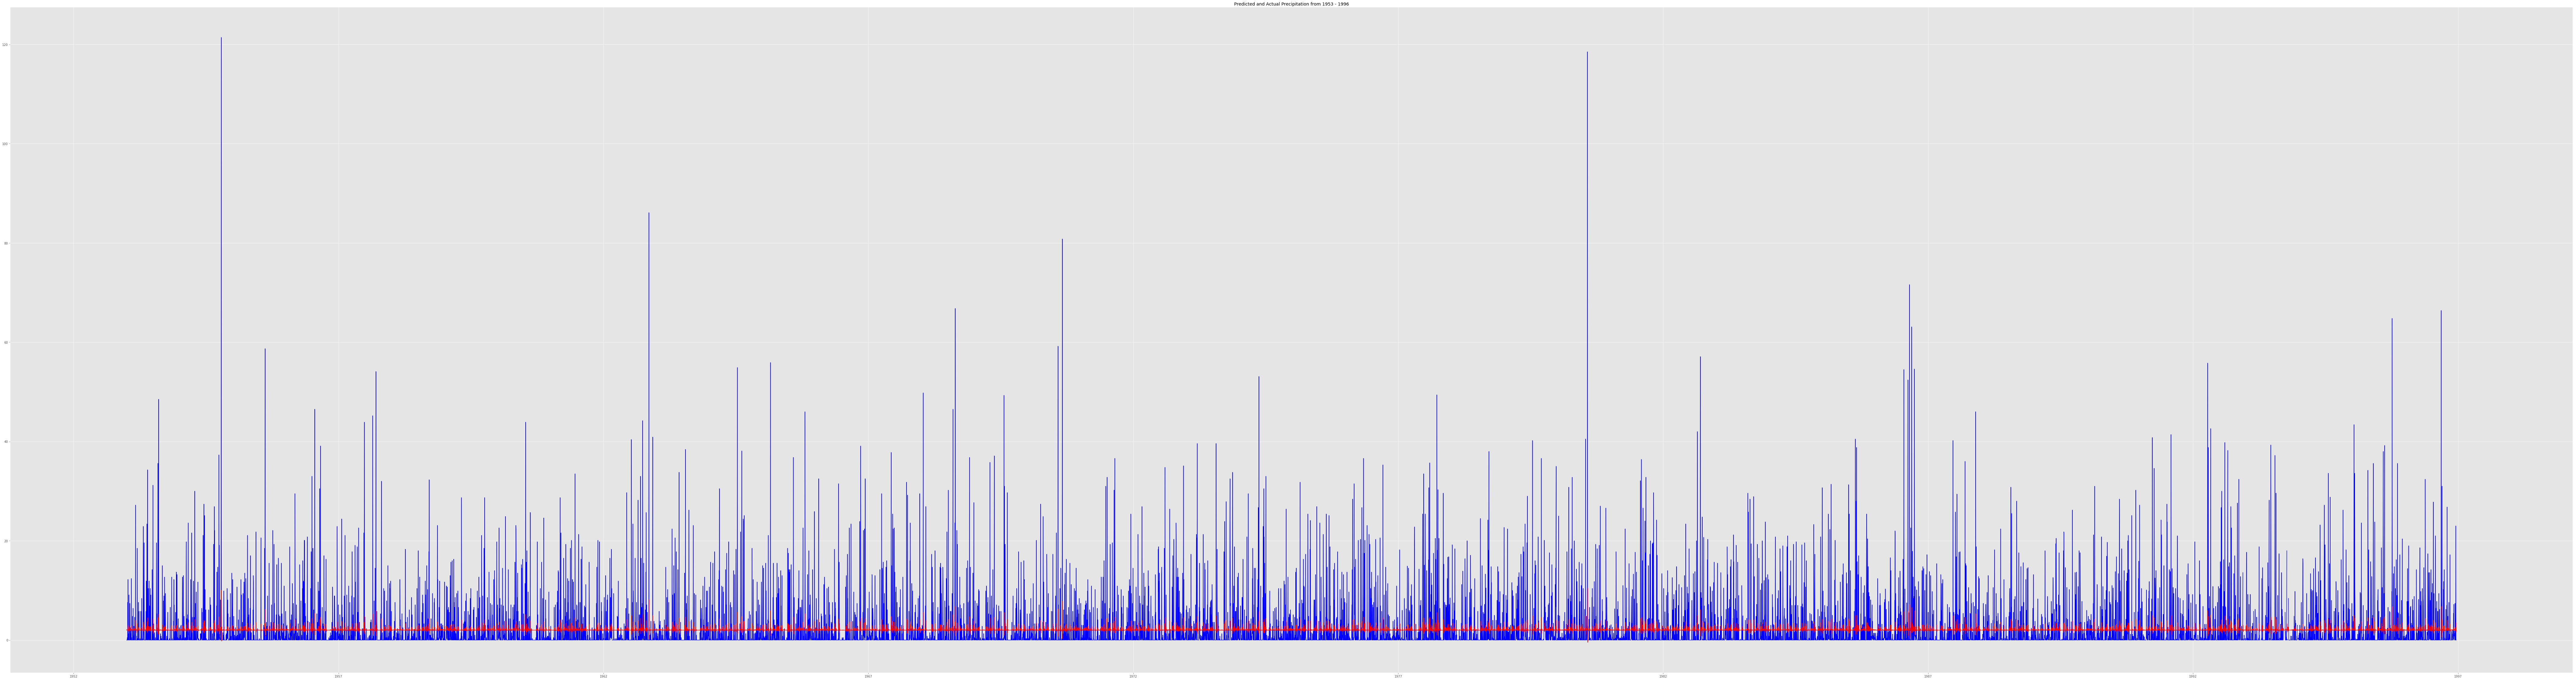

In [126]:
fig, ax = plt.subplots(figsize=(150, 40))
ax.autoscale_view()
plt.plot(s["Total Precip (mm)"], 'b-')
plt.plot(model_fit.fittedvalues, color='red')
plt.title('Predicted and Actual Precipitation from 1953 - 1996')

### Residuals

Plot the residuls and error density.

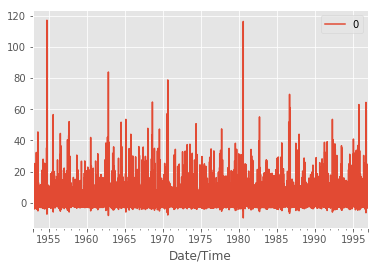

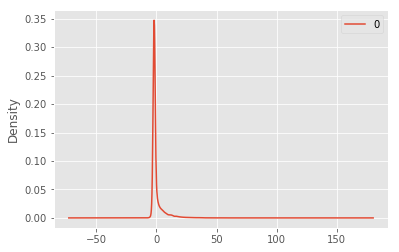

                  0
count  16060.000000
mean       0.000005
std        5.596468
min       -9.672329
25%       -2.006939
50%       -1.985236
75%       -0.910015
max      117.076909


In [127]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### Model Prediction & Scoring

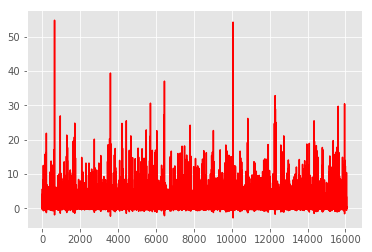

In [129]:
prediction = model.predict(testd["Total Precip (mm)"].fillna(0))
plt.plot(prediction, color='red')